### Kütüphaneler

In [1]:
#!pip install seaborn
#!pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.style.use('fivethirtyeight')
#os.chdir('..')
#!pip freeze > requirements.txt
#os.chdir('codes')

## Fonksiyonlar

In [2]:
def vis(x):
    plt.figure(figsize=(12,4))
    plt.plot(x['Close'])
    plt.title('Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price ($USD)')
    plt.xticks(rotation=45)
    plt.show()
def bsvis(x):
    plt.figure_figsize=(12.2,4.5)
    plt.scatter(x.index,x['Buy_Signal_Price'],color='green',label='Buy',marker='^',alpha=1)
    plt.scatter(x.index,x['Sell_Signal_Price'],color='red',label='Sell',marker='v',alpha=1)
    plt.plot(x['Close'],label='Close Price',alpha = 0.35)
    plt.title('Close Proice Buy & Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.show()

In [3]:



#Create a function to signal when to buy and sell an asset
def MACDst(data,shortspan=12,longspan=26,signalspan=9):
    #MACF and signal line
    #shortEMA
    ShortEMA = data.Close.ewm(span=shortspan,adjust=False).mean()
    #longEMA
    LongEMA = data.Close.ewm(span=longspan,adjust=False).mean()
    #MACD line
    MACD = ShortEMA - LongEMA
    #signal line
    signal = MACD.ewm(span=signalspan,adjust=False).mean()
    #Create ne columns
    data['MACD'] = MACD
    data['signal_line'] = signal
    buy = []
    sell = []
    flag = -1
    for i in range(0,len(data)):
        if data['MACD'][i] > data['signal_line'][i]:
            sell.append(np.nan)
            if flag != 1:
                buy.append(data['Close'][i])
                flag = 1
            else:
                buy.append(np.nan)
        elif data['MACD'][i] < data['signal_line'][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append(data['Close'][i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    data['Buy_Signal_Price'] = buy
    data['Sell_Signal_Price'] = sell
    return data

def getLevels(price):
    if price >= first_level:
        return (max_price,first_level)
    elif price >= second_level:
        return (first_level,second_level)
    elif price >= third_level:
        return (second_level,third_level)
    elif price >= fourth_level:
        return (third_level,fourth_level)
    else:
        return(fourth_level,min_price)

def fibonaccist(df,shortspan=12,longspan=26,signalspan=9):
    #Calculate the Fibonacci Retracement Levels
    global max_price
    global min_price
    global diff
    global first_level
    global second_level
    global third_level
    global fourth_level
    max_price = df['Close'].max()
    min_price = df['Close'].min()

    diff = max_price - min_price
    first_level = max_price - diff * 0.236
    second_level = max_price - diff * 0.382
    third_level = max_price - diff * 0.5
    fourth_level = max_price - diff * 0.618
    #Calculkate the MACD line and the Signal Line indicators
    #Calculate the Short Term Exponential Moving Average
    ShortEMA = df.Close.ewm(span=12,adjust=False).mean()
    #Calculate th eLong Term Exponential Moving Average
    LongEMA = df.Close.ewm(span=26,adjust=False).mean()
    #Calculate the Moving Average Convergence/Divergence (MACD)
    MACD = ShortEMA - LongEMA
    #Calculate the Signal Line
    signal = MACD.ewm(span=9,adjust=False).mean()
    df['MACD'] = MACD
    df['Signal Line'] = signal
    
    
    buy_list = []
    sell_list=[]
    flag = 0
    last_buy_price = 0
    
    #Loop through the dataset
    for i in range (0,df.shape[0]):
        price=df['Close'][i]
        #If this is the first data point within the dataset, and then get the level above and below it.
        if i == 0:
            upper_lvl, lower_lvl = getLevels(price)
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        #Else if the current price is greater than or equal to the upper_lvl or less than or equal to the lover_lvl, then we know the price hast 'hit' or crossed a new Fibonacci Level
        elif price >= upper_lvl or price <= lower_lvl:
            #Check to see if the MACD line crossed above or below the signal line
            if df['Signal Line'][i] > df['MACD'][i] and flag ==0:
                last_buy_price = price
                buy_list.append(price)
                sell_list.append(np.nan)
                #Set the flag to 1 to signal that the share was bought
                flag = 1
            elif df['Signal Line'][i] < df['MACD'][i] and flag == 1 and price >= last_buy_price:
                buy_list.append(np.nan)
                sell_list.append(price)
                #Set the flag to 0 to signal that the share was sold
                flag = 0
            else:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        #Update the new levels
        upper_lvl,lower_lvl = getLevels(price)
    df['Buy_Signal_Price'] = buy_list
    df['Sell_Signal_Price'] = sell_list
    return df

def threeMA(data,shortspan=5,middlespan=21,longspan=63):
    #3 moving averages
    #short/fast exponential moving average
    ShortEMA = data.Close.ewm(span=5,adjust=False).mean()
    #middle/medium exponential moving average
    MiddleEMA = data.Close.ewm(span=21,adjust=False).mean()
    #long/slow exponential moving average
    LongEMA = data.Close.ewm(span=63,adjust=False).mean()
    data['Short'] = ShortEMA
    data['Middle'] = MiddleEMA
    data['Long'] = LongEMA
    buy_list=[]
    sell_list=[]
    flag_long = False
    flag_short = False
    
    for i in range(0,len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short = False
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long = False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
    data['Buy_Signal_Price'] = buy_list
    data['Sell_Signal_Price'] = sell_list
    return data

In [4]:
#os.getcwd()
df = pd.read_csv('C:\\Users\\user\\Desktop\\Workspace\\binance-bot\\datasets\\aapl.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Volume,Adj Close
2008-10-14,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79
...,...,...,...,...,...,...,...
1984-09-13,1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14
1984-09-12,1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98
1984-09-11,1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07
1984-09-10,1984-09-10,26.50,26.62,25.87,26.37,2346400,3.01


In [5]:
threeMA(df)

,Date,Open,High,Low,Close,Volume,Adj Close,Short,Middle,Long,Buy_Signal_Price,Sell_Signal_Price
2008-10-14,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08,104.080000,104.080000,104.080000,NaN,NaN
2008-10-13,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26,106.140000,104.641818,104.273125,110.26,NaN
2008-10-10,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80,103.026667,103.928926,104.039590,NaN,96.8
2008-10-09,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74,98.264444,102.548114,103.561478,88.74,NaN
2008-10-08,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79,95.439630,101.388286,103.131119,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1984-09-13,1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14,27.601122,26.346068,25.717386,NaN,NaN
1984-09-12,1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98,27.107415,26.325516,25.729968,NaN,NaN
1984-09-11,1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07,27.028276,26.375015,25.765594,NaN,NaN
1984-09-10,1984-09-10,26.50,26.62,25.87,26.37,2346400,3.01,26.808851,26.374559,25.784481,NaN,NaN


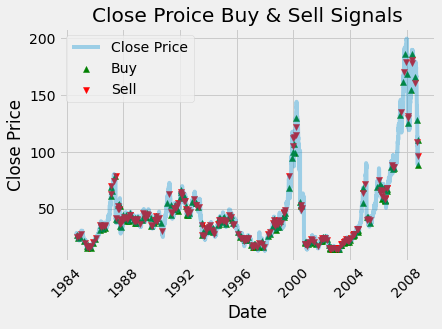

In [6]:
bsvis(threeMA(df))